**Objective:**


The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

Data Exploration: Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

Data Cleaning: Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers. Replace the value 0 in age as NaN Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

Data Analysis: Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually

Data Encoding: Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

Feature Scaling: After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Importing libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#importing dataset
df=pd.read_csv("Employee.csv")
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


**Data exploration and Data cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [6]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


The mean and median are almost similar.It indicates less outliers

In [8]:
df.shape

(148, 6)

In [9]:
df.duplicated().sum()

4

In [11]:
#droping duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(144, 6)

In [13]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [14]:
df["Age"].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

here we see that age as zero which is False

In [15]:
#we change that into nullvalue
df.loc[df["Age"]==0,"Age"]=np.nan
df["Age"].unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17., 54.])

In [16]:
df["Gender"].unique()

array([0, 1], dtype=int64)

In [17]:
#Replacing M,F to 0,1 respectively
df["Gender"].replace({0: "M", 1: "F"}, inplace=True)
df["Gender"].unique()

array(['M', 'F'], dtype=object)

In [18]:
df.Company.unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

Similar company names found

In [21]:
#Changing the names
df["Company"].replace({"Tata Consultancy Services":"TCS","Infosys Pvt Lmt":"Infosys"} , inplace=True)
df.Company.unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Congnizant'], dtype=object)

In [23]:
df.Place.unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [24]:
df.Salary.unique()

array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.])

In [25]:
df.Country.unique()

array(['India'], dtype=object)

In [26]:
#droping Country column becuase its not useful
df.drop(columns="Country",inplace=True)
df

,Company,Age,Salary,Place,Gender
0,TCS,20.0,NaN,Chennai,M
1,Infosys,30.0,NaN,Mumbai,M
2,TCS,35.0,2300.0,Calcutta,M
3,Infosys,40.0,3000.0,Delhi,M
4,TCS,23.0,4000.0,Mumbai,M
...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,M
143,TCS,33.0,9024.0,Calcutta,F
145,Infosys,44.0,4034.0,Delhi,F
146,TCS,33.0,5034.0,Mumbai,F


In [27]:
df.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Gender      0
dtype: int64

Gender column having no null values. Other columns have null values

In [32]:
#filling null values of age and salary with mean
df.Age.fillna(df.Age.mean().round(2),inplace=True)
df.Salary.fillna(df.Salary.mean().round(2),inplace=True)
df.isnull().sum()

Company     8
Age         0
Salary      0
Place      14
Gender      0
dtype: int64

In [35]:
#filling null values of company and place with mode
df.Company.fillna(df.Company.mode()[0],inplace=True)
df.Place.fillna(df.Place.mode()[0],inplace=True)
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Gender     0
dtype: int64

All null values filled

**Data Analysis**

In [37]:
#Filtering the data with age >40 and salary<5000
df1=df[(df["Age"]>40) & (df["Salary"]<5000)]
df1

,Company,Age,Salary,Place,Gender
21,Infosys,50.0,3184.0,Delhi,M
32,Infosys,45.0,4034.0,Calcutta,M
39,Infosys,41.0,3000.0,Mumbai,M
50,Infosys,41.0,3000.0,Chennai,M
57,Infosys,51.0,3184.0,Hyderabad,M
68,Infosys,43.0,4034.0,Mumbai,M
75,Infosys,44.0,3000.0,Cochin,M
86,Infosys,41.0,3000.0,Delhi,M
93,Infosys,54.0,3184.0,Mumbai,M
104,Infosys,44.0,4034.0,Delhi,M


In [45]:
#Correlation 
corr1=df[["Age","Salary"]].corr()
corr1

,Age,Salary
Age,1.000000,-0.020298
Salary,-0.020298,1.000000


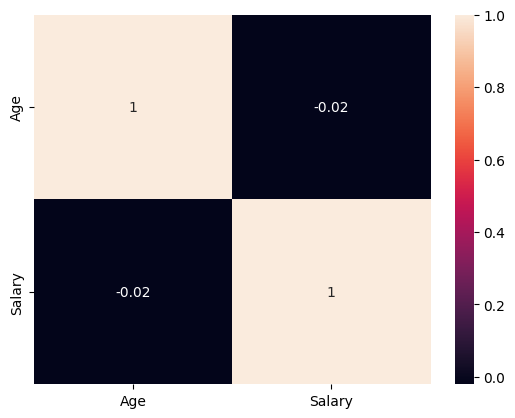

In [48]:
#heatmap
sns.heatmap(corr1,annot=True)
plt.show()

In [57]:
#Counting the number of people from each place and represent it visually
df2=pd.DataFrame({"No_of_Employees":df.Place.value_counts()}).reset_index()
df2.columns=["Place","No_of_Employees"]
df2

,Place,No_of_Employees
0,Mumbai,48
1,Calcutta,32
2,Chennai,14
3,Delhi,14
4,Cochin,13
5,Noida,8
6,Hyderabad,8
7,Podicherry,3
8,Pune,2
9,Bhopal,1


<function matplotlib.pyplot.show(close=None, block=None)>

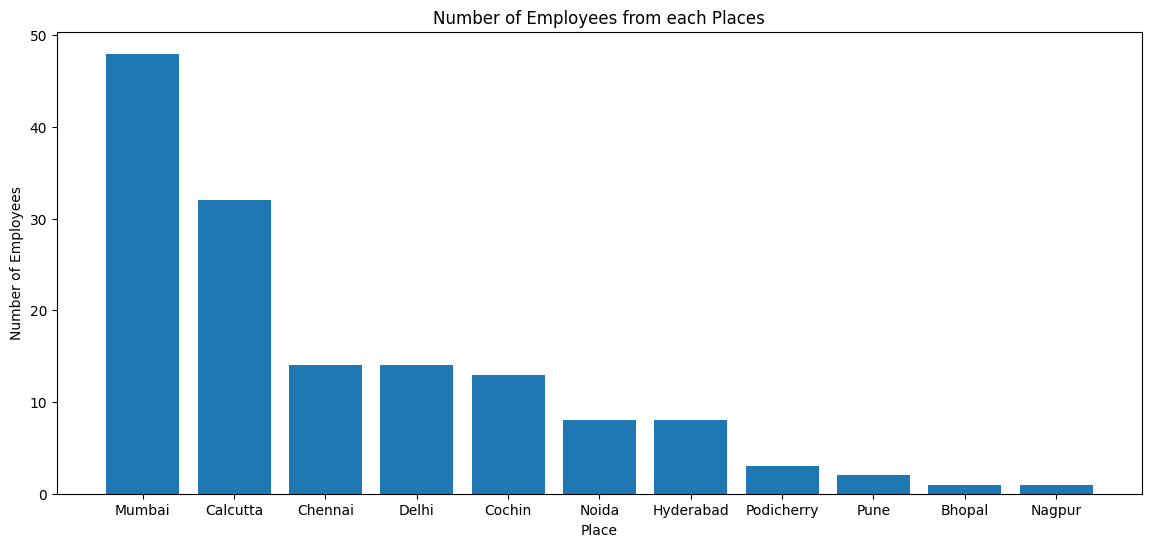

In [58]:
plt.figure(figsize=(14,6))
plt.bar(df2["Place"],df2["No_of_Employees"])
plt.xlabel("Place")
plt.ylabel("Number of Employees")
plt.title("Number of Employees from each Places")
plt.show

Mumbai has the highest number of employees with 48.Bhopal and nagpur has the least employees with only 1 each

**Data Encoding**

In [78]:
df.drop(columns="Gender",inplace=True)
df_one_hot_encoder=pd.get_dummies(data=df,columns=["Company","Place"])
df_one_hot_encoder

,Age,Salary,Company_CTS,Company_Congnizant,Company_Infosys,Company_TCS,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune
0,20.0,5283.47,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
1,30.0,5283.47,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,35.0,2300.00,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
3,40.0,3000.00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
4,23.0,4000.00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.00,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
143,33.0,9024.00,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False
145,44.0,4034.00,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
146,33.0,5034.00,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False


**Feature Scaling**

In [61]:
#importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [79]:
#Standard scaling
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(df_one_hot_encoder)
print(scaled_data)

[[-1.46735007e+00 -3.82514739e-07 -5.66657672e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [-2.48733237e-01 -3.82514739e-07 -5.66657672e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [ 3.60575182e-01 -1.26412238e+00 -5.66657672e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 ...
 [ 1.45733034e+00 -5.29411609e-01 -5.66657672e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [ 1.16851814e-01 -1.05702975e-01 -5.66657672e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]
 [-1.22362671e+00  1.23660598e+00 -5.66657672e-01 ... -2.42535625e-01
  -1.45864991e-01 -1.18678166e-01]]


In [81]:
#minimax scaling
min_scaler=MinMaxScaler()
scaled_data=min_scaler.fit_transform(df_one_hot_encoder)
print(scaled_data)

[[0.08108108 0.47734949 0.         ... 0.         0.         0.        ]
 [0.35135135 0.47734949 0.         ... 0.         0.         0.        ]
 [0.48648649 0.13781723 0.         ... 0.         0.         0.        ]
 ...
 [0.72972973 0.33515421 0.         ... 0.         0.         0.        ]
 [0.43243243 0.44895869 0.         ... 0.         0.         0.        ]
 [0.13513514 0.80949129 0.         ... 0.         0.         0.        ]]
